In [1]:
# quick check the observation error from a cnvstat.nc4 file
# initial built: 2024/07/30
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

In [2]:
root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/cnvstats/q/full_CTRL'
fn = 'diag_conv_q_ges.2022062800.nc4'
rr = nc.Dataset(f"{root}/{fn}")


In [48]:
obstype    = rr.variables['Observation_Type'][:]
lat        = rr.variables['Latitude'][:]
lon        = rr.variables['Longitude'][:]
pres       = rr.variables['Pressure'][:]
inv_obserr = rr.variables['Errinv_Final'][:]
omf        = rr.variables['Obs_Minus_Forecast_adjusted'][:]
omfnbc     = rr.variables['Obs_Minus_Forecast_unadjusted'][:]
qc         = rr.variables['Prep_QC_Mark'][:]

plt_obstype = 187
use = np.where( (qc != 0) & (obstype == plt_obstype) )

lat_use        = lat[use]
lon_use        = lon[use]
pres_use       = pres[use]
inv_obserr_use = inv_obserr[use]
omf_use        = omf[use]
omfnbc_use     = omfnbc[use]
obstype_use    = obstype[use]

In [49]:
obstype_dic = {120: 'RAOB', 131: 'AMDAR', 132:'RECCO/DROP', 133:'MDCRS-ACARS', \
               134: 'TAMDAR (Mesaba,PenAir,Chautauqua)', 136:'?', \
               180: 'Sfc marine w/ reported Pstn', \
               181: 'SYNOP or METAR w/ reported Pstn', \
               182: 'Splash-level DROP', \
               183: 'SYNOP, METAR or sfc marine w/ missing Pstn; METAR also w/ missing altimeter', \
               187: 'METAR w/ missing Pstn, reported altimeter'}

In [50]:
set(obstype)

{120, 131, 133, 134, 136, 180, 181, 183, 187}

In [51]:
lat_use.shape

(42118,)

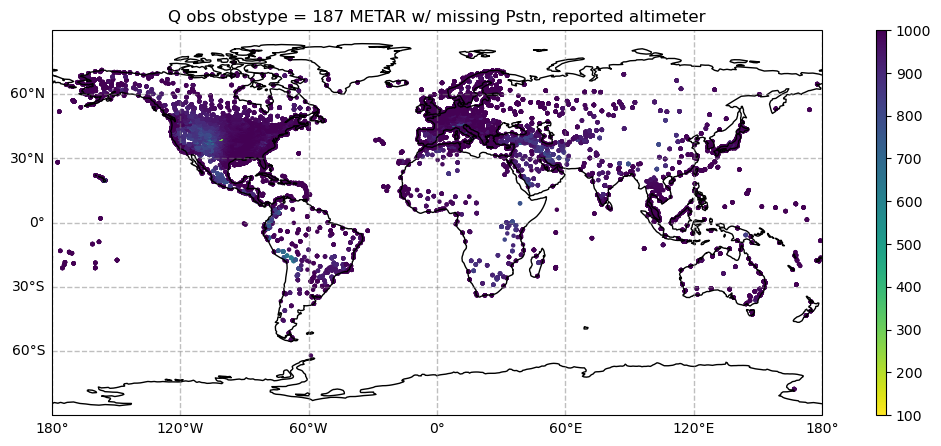

In [52]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lon_use, lat_use, c=pres_use, s=5, vmin=100, vmax=1000, cmap='viridis_r')

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'Q obs obstype = {plt_obstype} {obstype_dic[plt_obstype]}', fontsize=12)
cbar = fig.colorbar(scatter1,location='right',aspect=40)
#cbar.set_label('dT (K)', fontsize=14)

In [45]:
pres_use

masked_array(data=[ 250.8,  250.7, 1000.2, ...,  447.6,  253.1,  201.2],
             mask=False,
       fill_value=1e+20,
            dtype=float32)